In [1]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import orchest
import seaborn as sns
import pandas as pd
import numpy as np

# Exploratory Data Analysis (EDA)

The feature analysis and data analysis was provided by [future corporation](https://www.kaggle.com/futurecorporation/covid-19-sars-b-cells-basic-predictions-and-eda) and they have explain it pretty nicely. 

[<img alt="Kaggle" src="https://img.shields.io/badge/Future Corporation-basic predictions and EDA-161616?logo=Kaggle&style=for-the-badge" />](https://www.kaggle.com/futurecorporation/covid-19-sars-b-cells-basic-predictions-and-eda)

In [2]:
data = orchest.get_inputs()
bcell, covid, sars, bcell_sars = data["data"]

In [3]:
bcell_sars.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [4]:
bcell_sars.target.value_counts()

0    10865
1     4042
Name: target, dtype: int64

## Peptide feature
The feature value of peptides are largely follow normal distribution except for emini which contain outlier. There are no significant difference between target: 0 and target: 1 in 4 peptide feature in terms of difference of distribution.

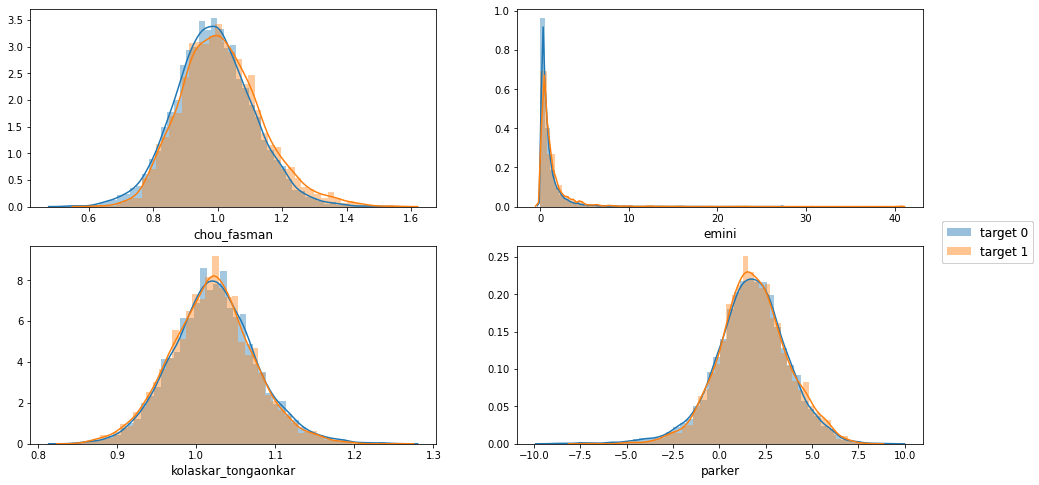

In [5]:
idx_train = bcell_sars["target"].astype("bool").values
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = [x for a in axes for x in a]
for i, name in enumerate(["chou_fasman", "emini", "kolaskar_tongaonkar", "parker"]):
    value = bcell_sars[name]
    sns.distplot(value[~idx_train], ax=axes[i])
    sns.distplot(value[idx_train], ax=axes[i])
    axes[i].set_xlabel(name, fontsize=12)
    fig.legend(labels=["target 0", "target 1"], loc="right", fontsize=12)

### Eliminate feature dimention via PCA 

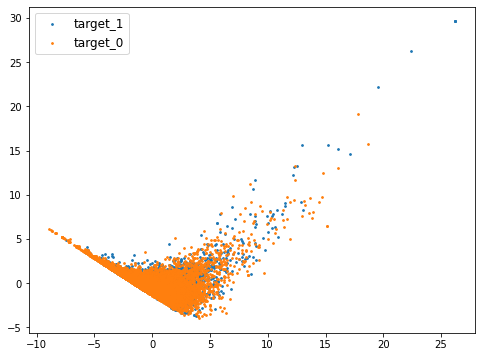

In [6]:
clf = PCA(n_components=2)
z = clf.fit_transform(
    bcell_sars[["chou_fasman", "emini", "kolaskar_tongaonkar", "parker"]]
)
plt.figure(figsize=(8, 6))
plt.scatter(*z[idx_train].T, s=3)
plt.scatter(*z[~idx_train].T, s=3)
plt.legend(labels=["target_1", "target_0"], fontsize=12)
plt.show()

## Protein feature
There are no significant difference between target 0 and target 1 in 4 peptide features in terms of difference of distribution.

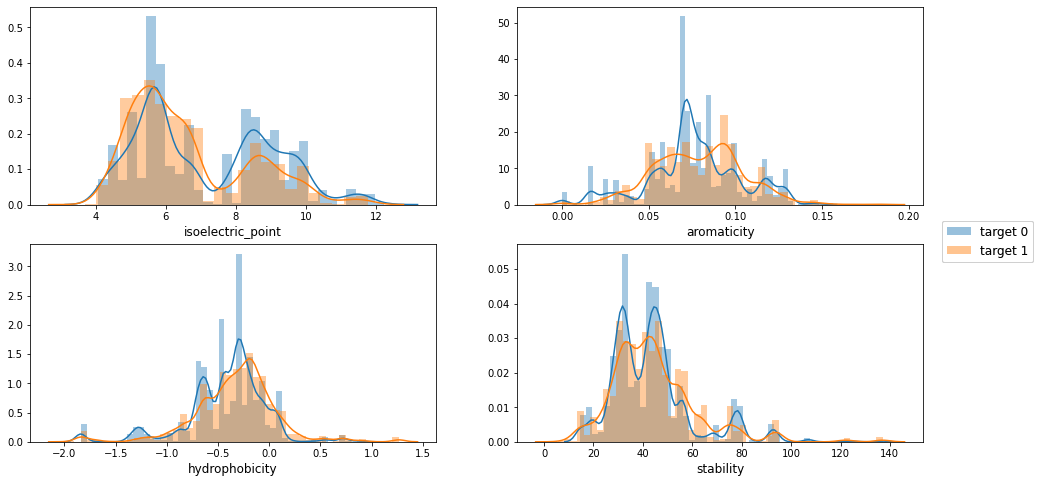

In [7]:
idx_train = bcell_sars["target"].astype("bool").values
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = [x for a in axes for x in a]
for i, name in enumerate(
    ["isoelectric_point", "aromaticity", "hydrophobicity", "stability"]
):
    value = bcell_sars[name]
    sns.distplot(value[~idx_train], ax=axes[i])
    sns.distplot(value[idx_train], ax=axes[i])
    axes[i].set_xlabel(name, fontsize=12)
    fig.legend(labels=["target 0", "target 1"], loc="right", fontsize=12)

### Eliminate Protein features dimention

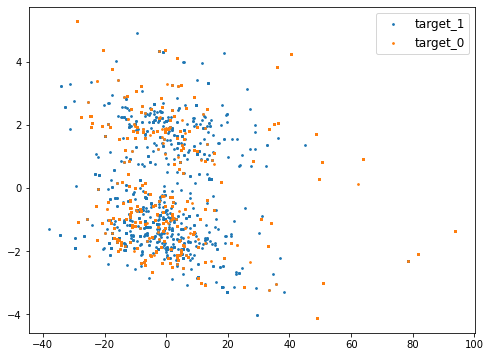

In [8]:
clf = PCA(n_components=2)
z = clf.fit_transform(
    bcell_sars[["isoelectric_point", "aromaticity", "hydrophobicity", "stability"]]
)
plt.figure(figsize=(8, 6))
plt.scatter(*z[idx_train].T, s=3)
plt.scatter(*z[~idx_train].T, s=3)
plt.legend(labels=["target_1", "target_0"], fontsize=12)
plt.show()

## Length
Almost of the length of peptides are within 5 to 20 length. The longest length of sequence is 393, and the shortest length is 5. The number of target: `1` is larger than that of target: `0`.

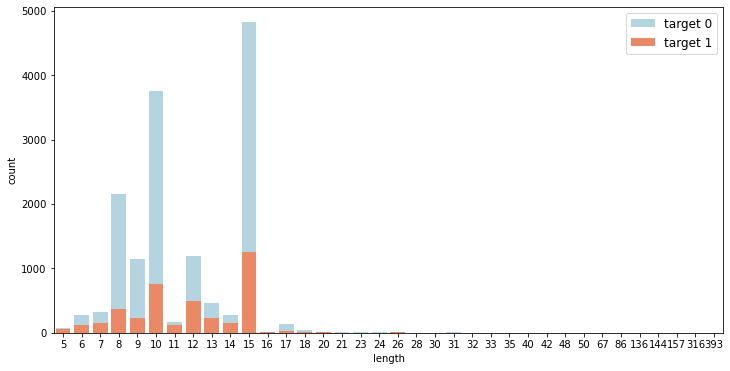

In [9]:
# create length columns
for df in [bcell, sars, covid, bcell_sars]:
    df["length"] = df["end_position"] - df["start_position"] + 1

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(bcell_sars["length"], ax=ax, color="lightblue")
sns.countplot(bcell_sars.query("target == 1")["length"], ax=ax, color="coral")
plt.legend(labels=["target 0", "target 1"], fontsize=12)
plt.show()


## Correlation
The `start position` and `end position` are highly positive correlated, where as `parker` and `kolaskar_tongaonkar` are hihgly negetive correlated. The heat map give us good idea on how the all of the feature are correlated so that we can focus on those features.

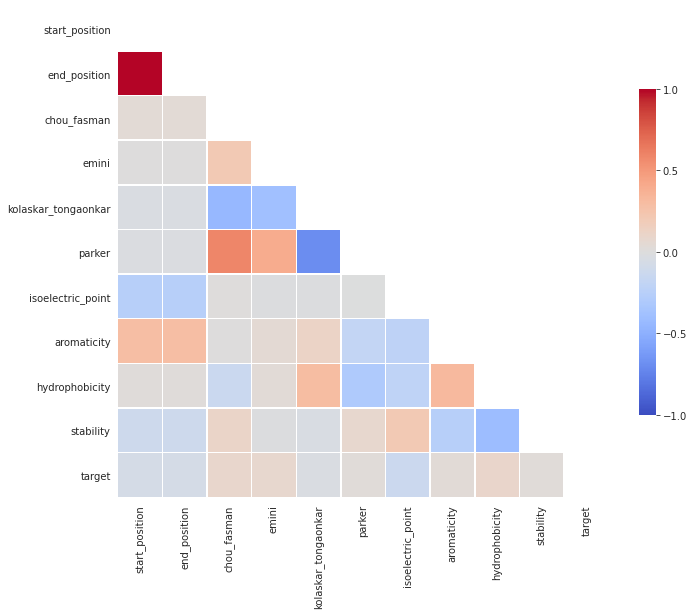

In [10]:
# Corelation Matrix
corr_matrix = bcell_sars[
    [
        "parent_protein_id",
        "protein_seq",
        "start_position",
        "end_position",
        "peptide_seq",
        "chou_fasman",
        "emini",
        "kolaskar_tongaonkar",
        "parker",
        "isoelectric_point",
        "aromaticity",
        "hydrophobicity",
        "stability",
        "target",
    ]
].corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#corr heatmap
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = False,
                      annot_kws = {'size': 12})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})